#### Distance Metrics to be Tested

1. Cosine 
2. Euclidean
3. Yule

In [1]:
#'''Required Libraries (uncomment for installation)'''

# !pip install pandas
# !pip install numpy
# !pip install scipy

In [2]:
'''Importing Libraries'''

import os
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

#### Distance Calulations

In [97]:
def plot_graph(sim_arr, model, label, k, gr_type = '-k'):
    x = np.linspace(0, len(sim_arr)-1, len(sim_arr), dtype=int)
    plt.plot(x, sim_arr, gr_type)

    plt.title("Distance Similarity Scores at k = " + k)              
    plt.xlabel('Count')
    plt.ylabel('Simialrity Scores')

    
#     if model == "LSA":
#         plt.title("Distance Similarity Scores at k = " + k)
#     elif model == "GloVe":
#         plt.title("Distance Similarity Scores")

In [125]:
'''Calculations to cehck the closest analogy answer'''

def after_distance(cont_arr, optio):
    
    max_arr, idx2, word = [], [], []
    
    for instances in range(len(cont_arr)):
        max_arr.append(np.amax(cont_arr[instances]))
    
    for ind_val2 in range(len(max_arr)):
        idx2.append(np.where(cont_arr[ind_val2] == max_arr[ind_val2]))
    idx2 = np.asarray(idx2)

    for i in range(len(optio)):
            word.append(optio[i][idx2[i]])
    
    return max_arr, word

In [126]:
'''Calculating Distance Function'''


def cal_distances(quest, optio, k, model="LSA"):    
    cosi_arr, eucd_arr, yule_arr = [], [], []
          
    for i in range(len(quest)):
        tmp_arr_cosi, tmp_arr_eucd, tmp_arr_yule = [], [], []
        
        for j in range(len(optio[i])):
            
            if model == "LSA":
                # Calculating Cosine 
                tmp_arr_cosi.append(1 - (distance.cosine(dict_word_vectors[quest[i][0]] - dict_word_vectors[quest[i][2]], \
                                                         dict_word_vectors[quest[i][1]] - dict_word_vectors[optio[i][j]])))

                # Calculating Euclidean 
                tmp_arr_eucd.append(1 - (distance.euclidean(dict_word_vectors[quest[i][0]] - dict_word_vectors[quest[i][2]], \
                                                            dict_word_vectors[quest[i][1]] - dict_word_vectors[optio[i][j]])))

                # Calculating Yule
                tmp_arr_yule.append(1 - (distance.yule(dict_word_vectors[quest[i][0]] - dict_word_vectors[quest[i][2]], \
                                                       dict_word_vectors[quest[i][1]] - dict_word_vectors[optio[i][j]])))
            
            
            elif model == "GloVe":
                # Calculating Cosine 
                tmp_arr_cosi.append(1 - (distance.cosine(glove_word_vector[quest[i][0]] - glove_word_vector[quest[i][2]], \
                                                         glove_word_vector[quest[i][1]] - glove_word_vector[optio[i][j]])))

                # Calculating Euclidean 
                tmp_arr_eucd.append(1 - (distance.euclidean(glove_word_vector[quest[i][0]] - glove_word_vector[quest[i][2]], \
                                                            glove_word_vector[quest[i][1]] - glove_word_vector[optio[i][j]])))

                # Calculating Yule
                tmp_arr_yule.append(1 - (distance.yule(glove_word_vector[quest[i][0]] - glove_word_vector[quest[i][2]], \
                                                       glove_word_vector[quest[i][1]] - glove_word_vector[optio[i][j]])))
                
        
        
        # Appending Arrays
        cosi_arr.append(tmp_arr_cosi)
        eucd_arr.append(tmp_arr_eucd)
        yule_arr.append(tmp_arr_yule)
    
    
    max_arr_cosi, word_cosi = after_distance(cosi_arr, optio)
    max_arr_eucd, word_eucd = after_distance(eucd_arr, optio)
    max_arr_yule, word_yule = after_distance(yule_arr, optio)
    
    # Generating Dataframes
    cosi_df = pd.DataFrame({"Calculated":word_cosi, "Similarity": max_arr_cosi, "Actual":ans_list})
    eucd_df = pd.DataFrame({"Calculated":word_eucd, "Similarity": max_arr_eucd, "Actual":ans_list})
    yule_df = pd.DataFrame({"Calculated":word_yule, "Similarity": max_arr_yule, "Actual":ans_list})


    # Generating Graphs
    for _ in k:
        plot_graph(max_arr_cosi, model, label = 'Cosine Distance', k = k, gr_type = '-r')
        plot_graph(max_arr_eucd, model, label = 'Euclidean Distance', k = k, gr_type = '-b')
        plot_graph(max_arr_yule, model, label = 'Yule Distance', k = k, gr_type = '-c')
        plt.show()
        
    
    
    return cosi_df, eucd_df, yule_df

#### Calling Questions and Options Dataframes for list Conversions 

In [73]:
'''Create List'''

def conv_list(df):
    que_list, opt_list = [], []
    
    for idx, row in df.iterrows():
        tmp_list_que = [row.A, row.B, row.C]
        tmp_list_opt = [row.E, row.F, row.G, row.H]

        que_list.append(tmp_list_que)
        opt_list.append(tmp_list_opt)

    return np.asarray(que_list), np.asarray(opt_list)

In [74]:
question = pd.read_csv('Que_Opt.csv', index_col=0)
answers  = pd.read_csv('Answers.csv', index_col=0)

ans_list = list(answers.T)
que_list, opt_list = conv_list(question)


### Importing Models

#### LSA .txt files for different k values

In [75]:
# # For Single File Tests

# '''Importing pickle txt File'''

# import pickle

# # Provide File Path
# path = "fiction_term_embeddings_TXT/term2topic_fiction_2.txt"

# word_file = open(path, "rb")
# word_vectors = pickle.load(word_file)
# word_file.close()

# dict_word_vectors = word_vectors
# dict_word_vectors

[0.9822072277271633, 0.8032620284707334, -0.9490739911561172, 0.9975995637137193, 0.9275462621151671]
[0.9785477849207501, 0.9407483019298413, 0.9827980990692207, 0.9973216278373029, 0.9956628427120998]
[0.7497358569059644, 0.9682496136964042, 1.0235294762452256, 3.617610737532866, 1.6363928447505938]


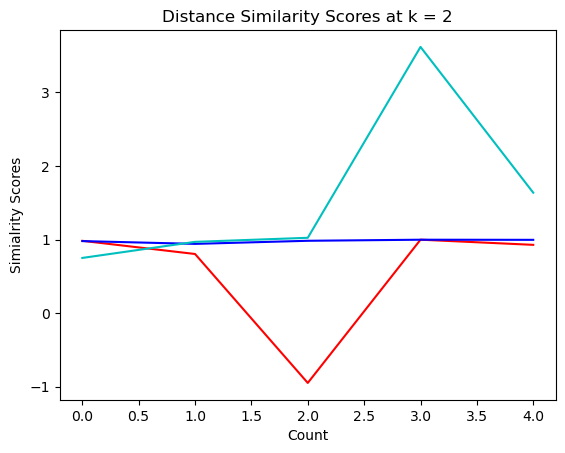

,Calculated,Similarity,Actual
0,[['night']],0.982207,duck
1,[['fell']],0.803262,squash
2,[['london']],-0.949074,damage
3,[['ascent']],0.997600,ascent
4,[['imprisonment']],0.927546,render


,Calculated,Similarity,Actual
0,[['night']],0.978548,duck
1,[['fell']],0.940748,squash
2,[['london']],0.982798,damage
3,[['absence']],0.997322,ascent
4,[['imprisonment']],0.995663,render


,Calculated,Similarity,Actual
0,[['thrills']],0.749736,duck
1,[['fell']],0.968250,squash
2,[['london']],1.023529,damage
3,[['earth']],3.617611,ascent
4,[['foot']],1.636393,render


[0.8452968115624235, 0.5821234425995152, -0.8138257772813597, 0.9064665513022816, 0.8744003144477266]
[0.9704861037228267, 0.9385016699039045, 0.9740566759312073, 0.9864372415653144, 0.9915602547531557]
[1.0130617922030434, 1.8495116080289136, 0.7534700727214203, 0.9159641510641181, 0.9265913995084085]


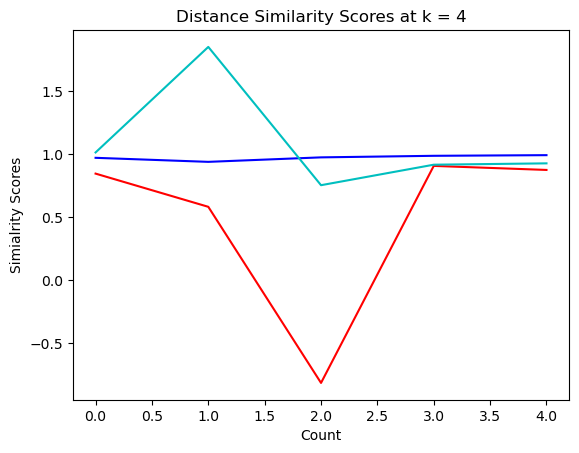

,Calculated,Similarity,Actual
0,[['night']],0.845297,duck
1,[['fell']],0.582123,squash
2,[['london']],-0.813826,damage
3,[['ascent']],0.906467,ascent
4,[['imprisonment']],0.874400,render


,Calculated,Similarity,Actual
0,[['night']],0.970486,duck
1,[['fell']],0.938502,squash
2,[['london']],0.974057,damage
3,[['absence']],0.986437,ascent
4,[['imprisonment']],0.991560,render


,Calculated,Similarity,Actual
0,[['night']],1.013062,duck
1,[['fell']],1.849512,squash
2,[['thunder']],0.753470,damage
3,[['child']],0.915964,ascent
4,[['imprisonment']],0.926591,render


[0.7005852701192425, 0.3198097015570289, -0.7965475985979409, 0.7904894826465674, 0.8772584318695991]
[0.9486541170317356, 0.9258581641841119, 0.9645752307005249, 0.9764215380682053, 0.9904570688629326]
[1.7852546845876147, 2.850173437366596, 0.6853942790696672, 1.238416469615009, 0.9089372650894292]


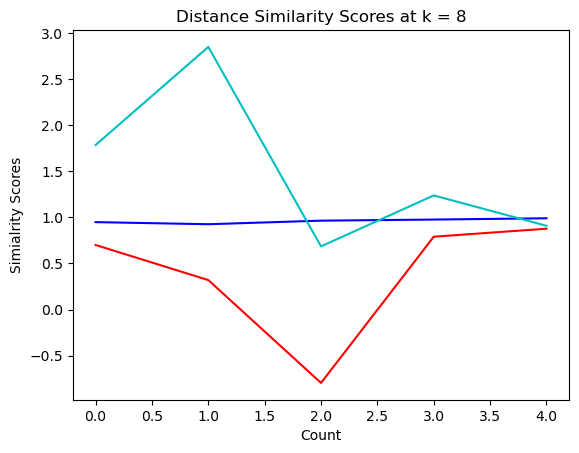

,Calculated,Similarity,Actual
0,[['night']],0.700585,duck
1,[['fell']],0.319810,squash
2,[['london']],-0.796548,damage
3,[['ascent']],0.790489,ascent
4,[['imprisonment']],0.877258,render


,Calculated,Similarity,Actual
0,[['night']],0.948654,duck
1,[['fell']],0.925858,squash
2,[['thunder']],0.964575,damage
3,[['ascent']],0.976422,ascent
4,[['imprisonment']],0.990457,render


,Calculated,Similarity,Actual
0,[['storm']],1.785255,duck
1,[['fell']],2.850173,squash
2,[['thunder']],0.685394,damage
3,[['child']],1.238416,ascent
4,[['imprisonment']],0.908937,render


[0.6403964806138417, -0.08102619589885984, -0.5631534181488416, 0.5522069128676486, 0.4028901676686232]
[0.930722455846024, 0.8992431083243889, 0.9585788155784828, 0.9561000693479436, 0.9760673436517424]
[3.194411358730232, 1.0085223833847496, 0.8887240362516791, 6.8740287565598654, 0.9858427676346246]


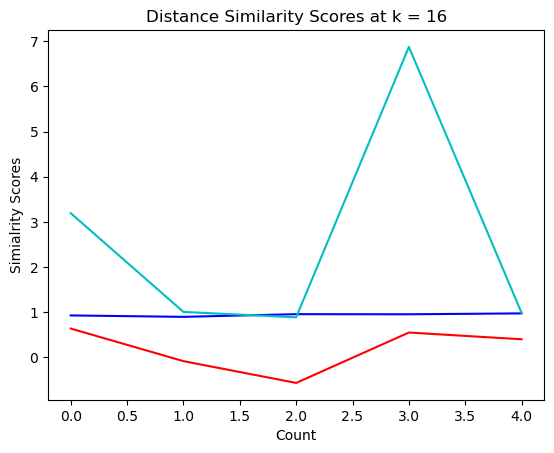

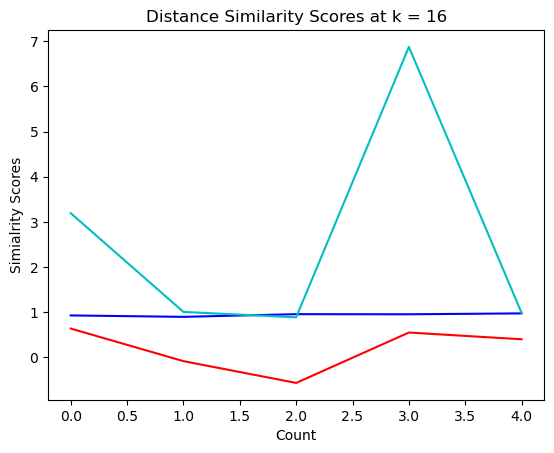

,Calculated,Similarity,Actual
0,[['night']],0.640396,duck
1,[['fell']],-0.081026,squash
2,[['london']],-0.563153,damage
3,[['absence']],0.552207,ascent
4,[['imprisonment']],0.402890,render


,Calculated,Similarity,Actual
0,[['night']],0.930722,duck
1,[['curate']],0.899243,squash
2,[['thunder']],0.958579,damage
3,[['earth']],0.956100,ascent
4,[['imprisonment']],0.976067,render


,Calculated,Similarity,Actual
0,[['storm']],3.194411,duck
1,[['weybridge']],1.008522,squash
2,[['thunder']],0.888724,damage
3,[['earth']],6.874029,ascent
4,[['imprisonment']],0.985843,render


[0.370652009200666, -0.2619857107286121, -0.3403599774942718, 0.15058524999507183, 0.40084040781146213]
[0.901785240204819, 0.8822236056137286, 0.944802586105046, 0.9298135662970878, 0.9690120169610866]
[1.369913262286758, 1.0076820466421246, 0.9406798617980475, 0.8669994877675735, 2.861014412150994]


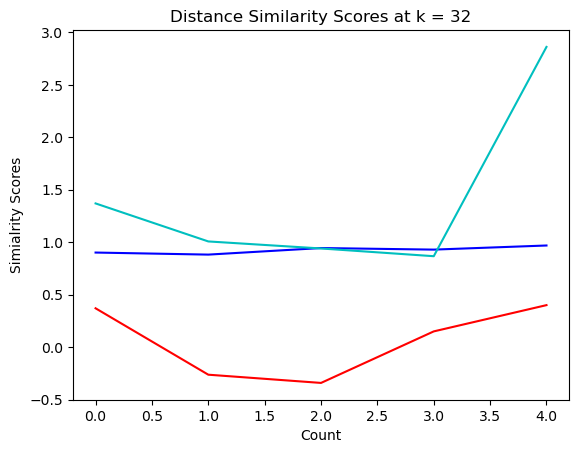

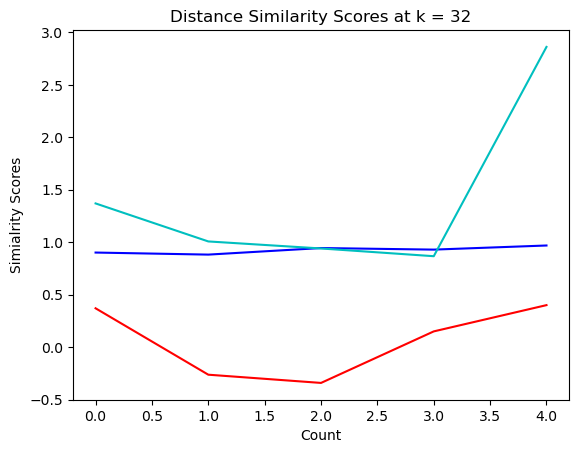

,Calculated,Similarity,Actual
0,[['night']],0.370652,duck
1,[['fell']],-0.261986,squash
2,[['thunder']],-0.340360,damage
3,[['absence']],0.150585,ascent
4,[['imprisonment']],0.400840,render


,Calculated,Similarity,Actual
0,[['storm']],0.901785,duck
1,[['curate']],0.882224,squash
2,[['thunder']],0.944803,damage
3,[['ascent']],0.929814,ascent
4,[['imprisonment']],0.969012,render


,Calculated,Similarity,Actual
0,[['storm']],1.369913,duck
1,[['fell']],1.007682,squash
2,[['exodus']],0.940680,damage
3,[['ascent']],0.866999,ascent
4,[['days']],2.861014,render


[0.23991372285482637, -0.2381324359202326, -0.13914021784983444, 0.03900002659127666, 0.24085402988651194]
[0.8779580709692882, 0.8628099888269688, 0.9339024383493781, 0.9118658481651406, 0.9541842779721468]
[8.036415592510767, 1.0023635906062776, 0.8630303479431004, 2.470902393987506, 2.1733787237703623]


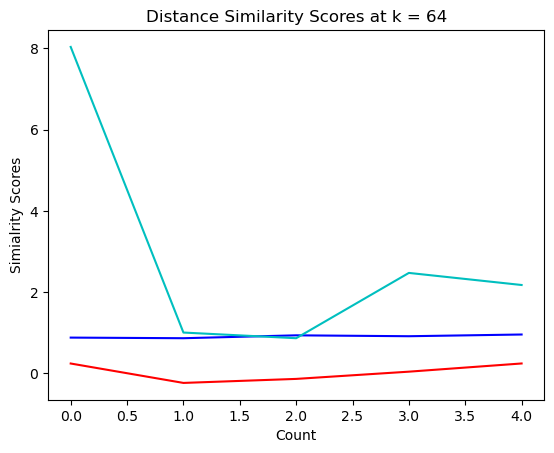

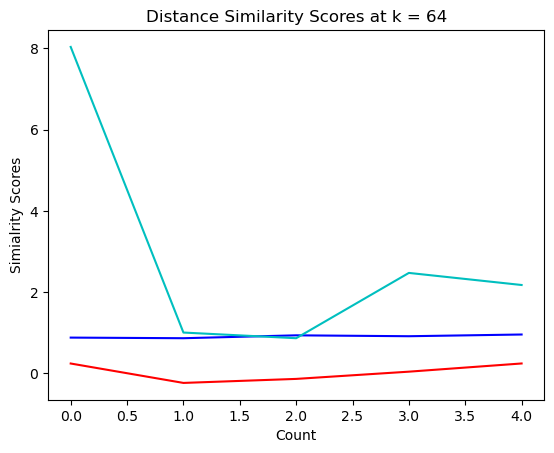

,Calculated,Similarity,Actual
0,[['night']],0.239914,duck
1,[['fell']],-0.238132,squash
2,[['thunder']],-0.139140,damage
3,[['child']],0.039000,ascent
4,[['imprisonment']],0.240854,render


,Calculated,Similarity,Actual
0,[['storm']],0.877958,duck
1,[['curate']],0.862810,squash
2,[['thunder']],0.933902,damage
3,[['ascent']],0.911866,ascent
4,[['imprisonment']],0.954184,render


,Calculated,Similarity,Actual
0,[['storm']],8.036416,duck
1,[['weybridge']],1.002364,squash
2,[['london']],0.863030,damage
3,[['child']],2.470902,ascent
4,[['days']],2.173379,render


[0.9822072277271633, 0.8032620284707334, -0.9490739911561172, 0.9975995637137193, 0.9275462621151671]
[0.9785477849207501, 0.9407483019298413, 0.9827980990692207, 0.9973216278373029, 0.9956628427120998]
[0.7497358569059644, 0.9682496136964042, 1.0235294762452256, 3.617610737532866, 1.6363928447505938]


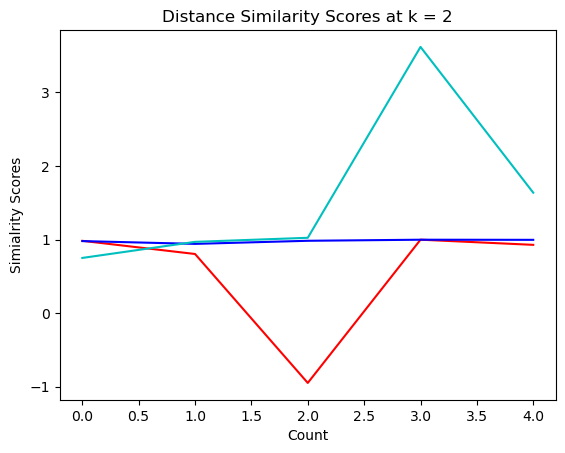

,Calculated,Similarity,Actual
0,[['night']],0.982207,duck
1,[['fell']],0.803262,squash
2,[['london']],-0.949074,damage
3,[['ascent']],0.997600,ascent
4,[['imprisonment']],0.927546,render


,Calculated,Similarity,Actual
0,[['night']],0.978548,duck
1,[['fell']],0.940748,squash
2,[['london']],0.982798,damage
3,[['absence']],0.997322,ascent
4,[['imprisonment']],0.995663,render


,Calculated,Similarity,Actual
0,[['thrills']],0.749736,duck
1,[['fell']],0.968250,squash
2,[['london']],1.023529,damage
3,[['earth']],3.617611,ascent
4,[['foot']],1.636393,render


[0.8452968115624235, 0.5821234425995152, -0.8138257772813597, 0.9064665513022816, 0.8744003144477266]
[0.9704861037228267, 0.9385016699039045, 0.9740566759312073, 0.9864372415653144, 0.9915602547531557]
[1.0130617922030434, 1.8495116080289136, 0.7534700727214203, 0.9159641510641181, 0.9265913995084085]


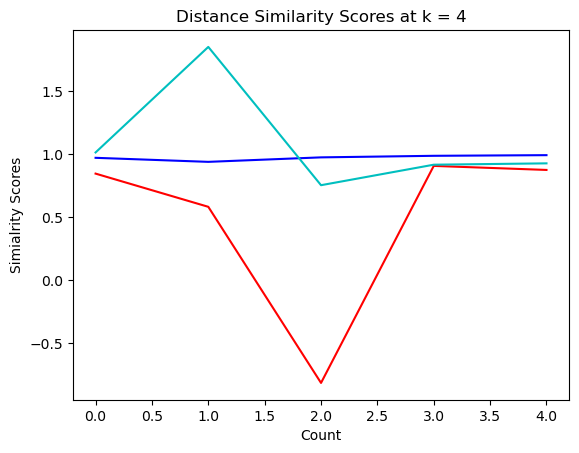

,Calculated,Similarity,Actual
0,[['night']],0.845297,duck
1,[['fell']],0.582123,squash
2,[['london']],-0.813826,damage
3,[['ascent']],0.906467,ascent
4,[['imprisonment']],0.874400,render


,Calculated,Similarity,Actual
0,[['night']],0.970486,duck
1,[['fell']],0.938502,squash
2,[['london']],0.974057,damage
3,[['absence']],0.986437,ascent
4,[['imprisonment']],0.991560,render


,Calculated,Similarity,Actual
0,[['night']],1.013062,duck
1,[['fell']],1.849512,squash
2,[['thunder']],0.753470,damage
3,[['child']],0.915964,ascent
4,[['imprisonment']],0.926591,render


[0.7005852701192425, 0.3198097015570289, -0.7965475985979409, 0.7904894826465674, 0.8772584318695991]
[0.9486541170317356, 0.9258581641841119, 0.9645752307005249, 0.9764215380682053, 0.9904570688629326]
[1.7852546845876147, 2.850173437366596, 0.6853942790696672, 1.238416469615009, 0.9089372650894292]


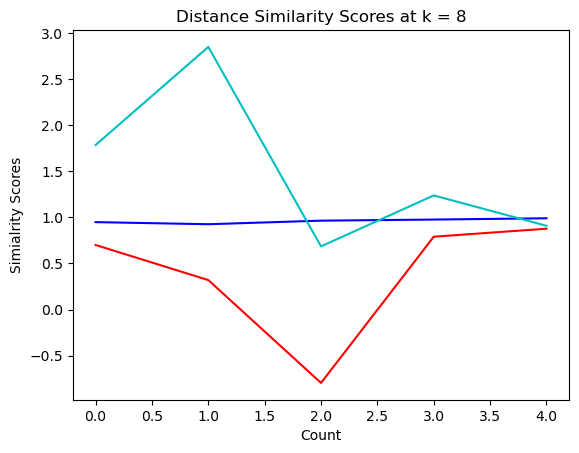

,Calculated,Similarity,Actual
0,[['night']],0.700585,duck
1,[['fell']],0.319810,squash
2,[['london']],-0.796548,damage
3,[['ascent']],0.790489,ascent
4,[['imprisonment']],0.877258,render


,Calculated,Similarity,Actual
0,[['night']],0.948654,duck
1,[['fell']],0.925858,squash
2,[['thunder']],0.964575,damage
3,[['ascent']],0.976422,ascent
4,[['imprisonment']],0.990457,render


,Calculated,Similarity,Actual
0,[['storm']],1.785255,duck
1,[['fell']],2.850173,squash
2,[['thunder']],0.685394,damage
3,[['child']],1.238416,ascent
4,[['imprisonment']],0.908937,render


[0.6403964806138417, -0.08102619589885984, -0.5631534181488416, 0.5522069128676486, 0.4028901676686232]
[0.930722455846024, 0.8992431083243889, 0.9585788155784828, 0.9561000693479436, 0.9760673436517424]
[3.194411358730232, 1.0085223833847496, 0.8887240362516791, 6.8740287565598654, 0.9858427676346246]


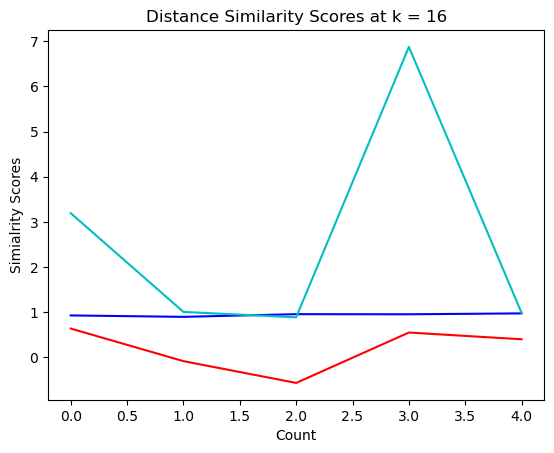

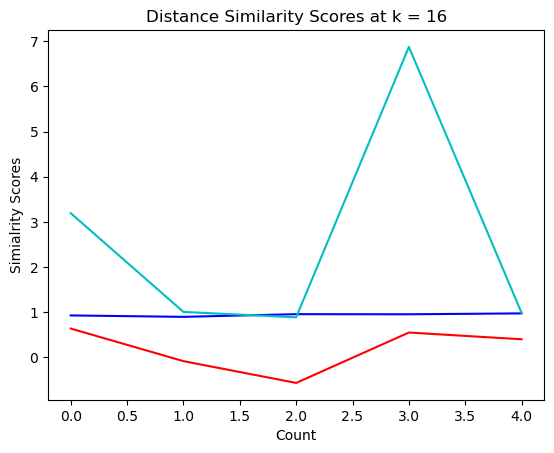

,Calculated,Similarity,Actual
0,[['night']],0.640396,duck
1,[['fell']],-0.081026,squash
2,[['london']],-0.563153,damage
3,[['absence']],0.552207,ascent
4,[['imprisonment']],0.402890,render


,Calculated,Similarity,Actual
0,[['night']],0.930722,duck
1,[['curate']],0.899243,squash
2,[['thunder']],0.958579,damage
3,[['earth']],0.956100,ascent
4,[['imprisonment']],0.976067,render


,Calculated,Similarity,Actual
0,[['storm']],3.194411,duck
1,[['weybridge']],1.008522,squash
2,[['thunder']],0.888724,damage
3,[['earth']],6.874029,ascent
4,[['imprisonment']],0.985843,render


[0.370652009200666, -0.2619857107286121, -0.3403599774942718, 0.15058524999507183, 0.40084040781146213]
[0.901785240204819, 0.8822236056137286, 0.944802586105046, 0.9298135662970878, 0.9690120169610866]
[1.369913262286758, 1.0076820466421246, 0.9406798617980475, 0.8669994877675735, 2.861014412150994]


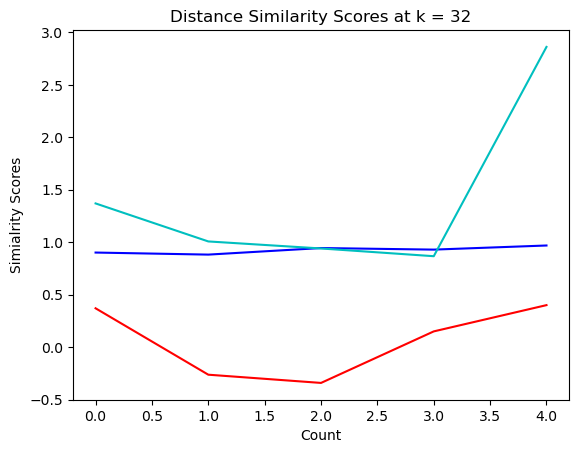

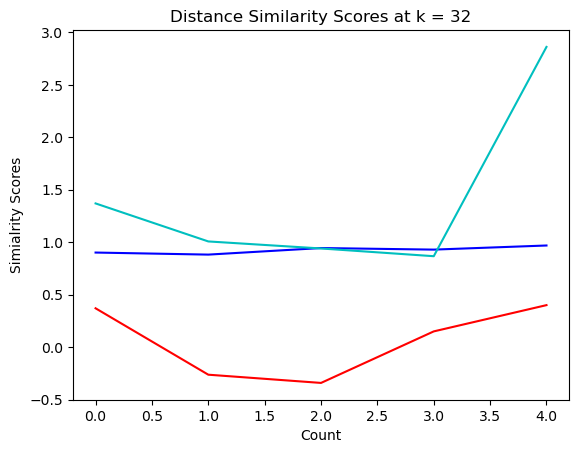

,Calculated,Similarity,Actual
0,[['night']],0.370652,duck
1,[['fell']],-0.261986,squash
2,[['thunder']],-0.340360,damage
3,[['absence']],0.150585,ascent
4,[['imprisonment']],0.400840,render


,Calculated,Similarity,Actual
0,[['storm']],0.901785,duck
1,[['curate']],0.882224,squash
2,[['thunder']],0.944803,damage
3,[['ascent']],0.929814,ascent
4,[['imprisonment']],0.969012,render


,Calculated,Similarity,Actual
0,[['storm']],1.369913,duck
1,[['fell']],1.007682,squash
2,[['exodus']],0.940680,damage
3,[['ascent']],0.866999,ascent
4,[['days']],2.861014,render


[0.23991372285482637, -0.2381324359202326, -0.13914021784983444, 0.03900002659127666, 0.24085402988651194]
[0.8779580709692882, 0.8628099888269688, 0.9339024383493781, 0.9118658481651406, 0.9541842779721468]
[8.036415592510767, 1.0023635906062776, 0.8630303479431004, 2.470902393987506, 2.1733787237703623]


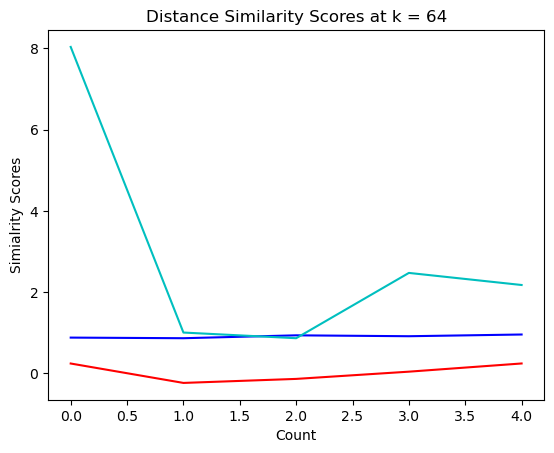

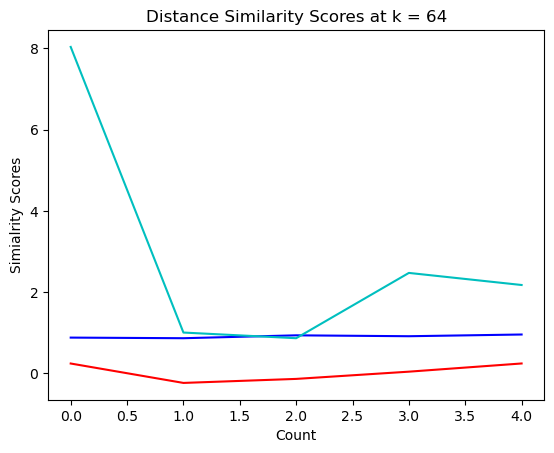

,Calculated,Similarity,Actual
0,[['night']],0.239914,duck
1,[['fell']],-0.238132,squash
2,[['thunder']],-0.139140,damage
3,[['child']],0.039000,ascent
4,[['imprisonment']],0.240854,render


,Calculated,Similarity,Actual
0,[['storm']],0.877958,duck
1,[['curate']],0.862810,squash
2,[['thunder']],0.933902,damage
3,[['ascent']],0.911866,ascent
4,[['imprisonment']],0.954184,render


,Calculated,Similarity,Actual
0,[['storm']],8.036416,duck
1,[['weybridge']],1.002364,squash
2,[['london']],0.863030,damage
3,[['child']],2.470902,ascent
4,[['days']],2.173379,render


[0.9822072277271633, 0.8032620284707334, -0.9490739911561172, 0.9975995637137193, 0.9275462621151671]
[0.9785477849207501, 0.9407483019298413, 0.9827980990692207, 0.9973216278373029, 0.9956628427120998]
[0.7497358569059644, 0.9682496136964042, 1.0235294762452256, 3.617610737532866, 1.6363928447505938]


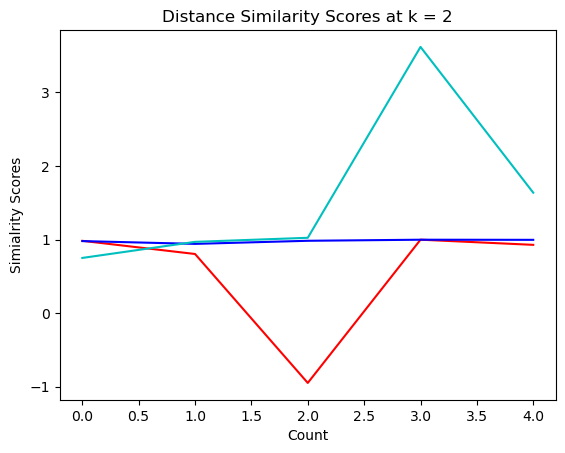

,Calculated,Similarity,Actual
0,[['night']],0.982207,duck
1,[['fell']],0.803262,squash
2,[['london']],-0.949074,damage
3,[['ascent']],0.997600,ascent
4,[['imprisonment']],0.927546,render


,Calculated,Similarity,Actual
0,[['night']],0.978548,duck
1,[['fell']],0.940748,squash
2,[['london']],0.982798,damage
3,[['absence']],0.997322,ascent
4,[['imprisonment']],0.995663,render


,Calculated,Similarity,Actual
0,[['thrills']],0.749736,duck
1,[['fell']],0.968250,squash
2,[['london']],1.023529,damage
3,[['earth']],3.617611,ascent
4,[['foot']],1.636393,render


[0.8452968115624235, 0.5821234425995152, -0.8138257772813597, 0.9064665513022816, 0.8744003144477266]
[0.9704861037228267, 0.9385016699039045, 0.9740566759312073, 0.9864372415653144, 0.9915602547531557]
[1.0130617922030434, 1.8495116080289136, 0.7534700727214203, 0.9159641510641181, 0.9265913995084085]


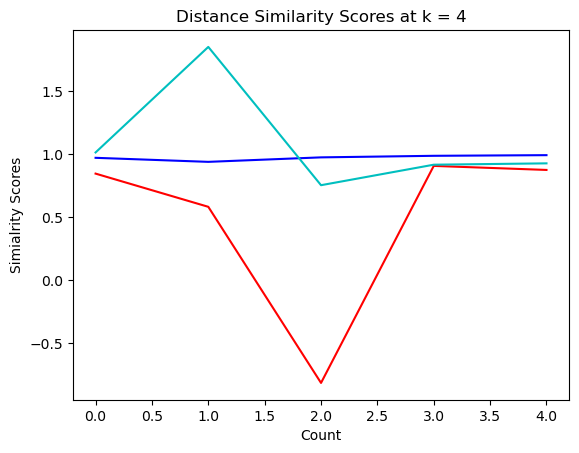

,Calculated,Similarity,Actual
0,[['night']],0.845297,duck
1,[['fell']],0.582123,squash
2,[['london']],-0.813826,damage
3,[['ascent']],0.906467,ascent
4,[['imprisonment']],0.874400,render


,Calculated,Similarity,Actual
0,[['night']],0.970486,duck
1,[['fell']],0.938502,squash
2,[['london']],0.974057,damage
3,[['absence']],0.986437,ascent
4,[['imprisonment']],0.991560,render


,Calculated,Similarity,Actual
0,[['night']],1.013062,duck
1,[['fell']],1.849512,squash
2,[['thunder']],0.753470,damage
3,[['child']],0.915964,ascent
4,[['imprisonment']],0.926591,render


[0.7005852701192425, 0.3198097015570289, -0.7965475985979409, 0.7904894826465674, 0.8772584318695991]
[0.9486541170317356, 0.9258581641841119, 0.9645752307005249, 0.9764215380682053, 0.9904570688629326]
[1.7852546845876147, 2.850173437366596, 0.6853942790696672, 1.238416469615009, 0.9089372650894292]


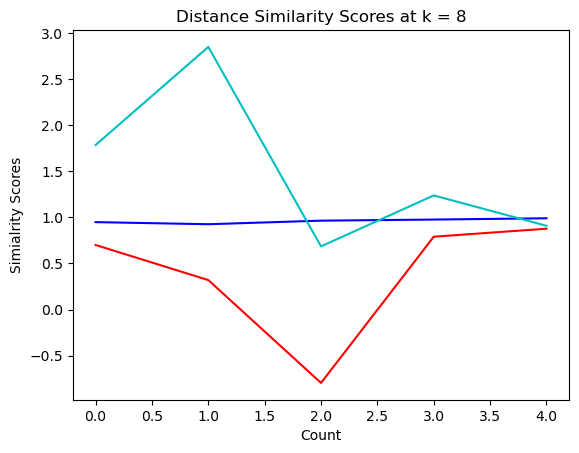

,Calculated,Similarity,Actual
0,[['night']],0.700585,duck
1,[['fell']],0.319810,squash
2,[['london']],-0.796548,damage
3,[['ascent']],0.790489,ascent
4,[['imprisonment']],0.877258,render


,Calculated,Similarity,Actual
0,[['night']],0.948654,duck
1,[['fell']],0.925858,squash
2,[['thunder']],0.964575,damage
3,[['ascent']],0.976422,ascent
4,[['imprisonment']],0.990457,render


,Calculated,Similarity,Actual
0,[['storm']],1.785255,duck
1,[['fell']],2.850173,squash
2,[['thunder']],0.685394,damage
3,[['child']],1.238416,ascent
4,[['imprisonment']],0.908937,render


[0.6403964806138417, -0.08102619589885984, -0.5631534181488416, 0.5522069128676486, 0.4028901676686232]
[0.930722455846024, 0.8992431083243889, 0.9585788155784828, 0.9561000693479436, 0.9760673436517424]
[3.194411358730232, 1.0085223833847496, 0.8887240362516791, 6.8740287565598654, 0.9858427676346246]


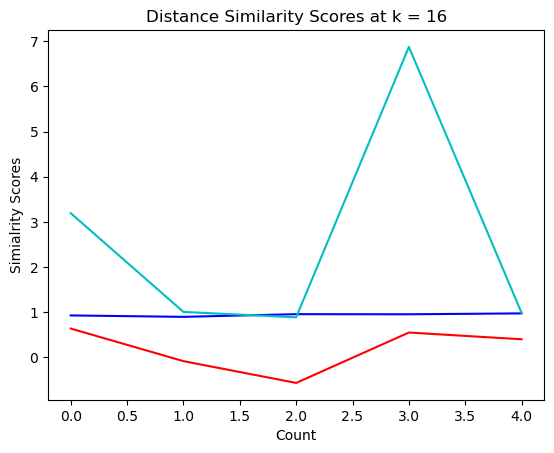

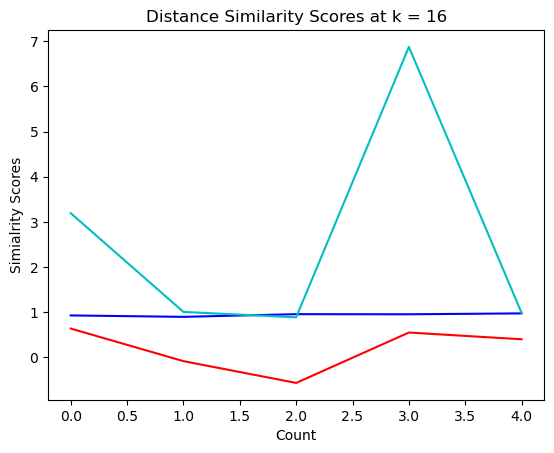

,Calculated,Similarity,Actual
0,[['night']],0.640396,duck
1,[['fell']],-0.081026,squash
2,[['london']],-0.563153,damage
3,[['absence']],0.552207,ascent
4,[['imprisonment']],0.402890,render


,Calculated,Similarity,Actual
0,[['night']],0.930722,duck
1,[['curate']],0.899243,squash
2,[['thunder']],0.958579,damage
3,[['earth']],0.956100,ascent
4,[['imprisonment']],0.976067,render


,Calculated,Similarity,Actual
0,[['storm']],3.194411,duck
1,[['weybridge']],1.008522,squash
2,[['thunder']],0.888724,damage
3,[['earth']],6.874029,ascent
4,[['imprisonment']],0.985843,render


[0.370652009200666, -0.2619857107286121, -0.3403599774942718, 0.15058524999507183, 0.40084040781146213]
[0.901785240204819, 0.8822236056137286, 0.944802586105046, 0.9298135662970878, 0.9690120169610866]
[1.369913262286758, 1.0076820466421246, 0.9406798617980475, 0.8669994877675735, 2.861014412150994]


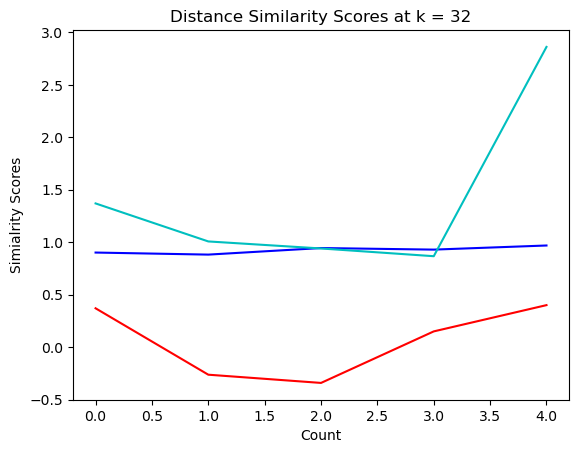

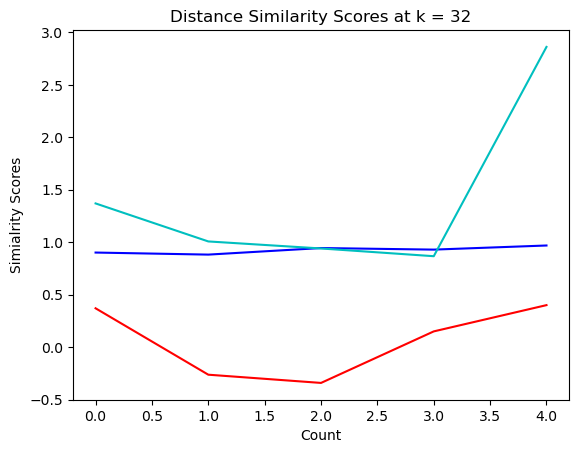

,Calculated,Similarity,Actual
0,[['night']],0.370652,duck
1,[['fell']],-0.261986,squash
2,[['thunder']],-0.340360,damage
3,[['absence']],0.150585,ascent
4,[['imprisonment']],0.400840,render


,Calculated,Similarity,Actual
0,[['storm']],0.901785,duck
1,[['curate']],0.882224,squash
2,[['thunder']],0.944803,damage
3,[['ascent']],0.929814,ascent
4,[['imprisonment']],0.969012,render


,Calculated,Similarity,Actual
0,[['storm']],1.369913,duck
1,[['fell']],1.007682,squash
2,[['exodus']],0.940680,damage
3,[['ascent']],0.866999,ascent
4,[['days']],2.861014,render


[0.23991372285482637, -0.2381324359202326, -0.13914021784983444, 0.03900002659127666, 0.24085402988651194]
[0.8779580709692882, 0.8628099888269688, 0.9339024383493781, 0.9118658481651406, 0.9541842779721468]
[8.036415592510767, 1.0023635906062776, 0.8630303479431004, 2.470902393987506, 2.1733787237703623]


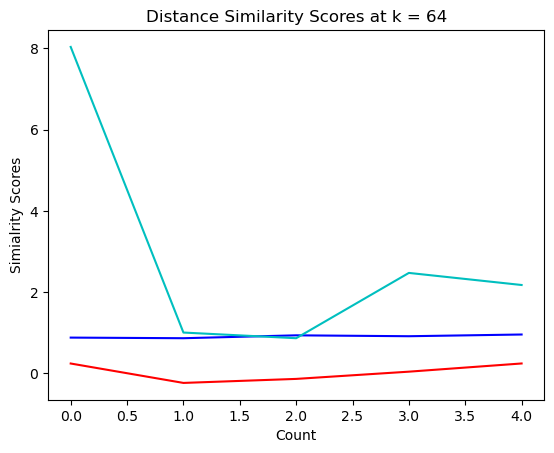

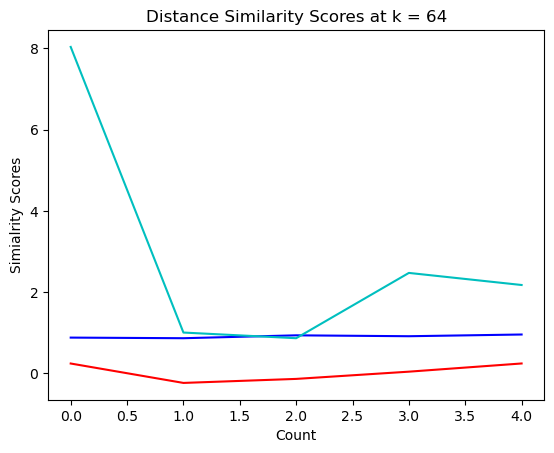

,Calculated,Similarity,Actual
0,[['night']],0.239914,duck
1,[['fell']],-0.238132,squash
2,[['thunder']],-0.139140,damage
3,[['child']],0.039000,ascent
4,[['imprisonment']],0.240854,render


,Calculated,Similarity,Actual
0,[['storm']],0.877958,duck
1,[['curate']],0.862810,squash
2,[['thunder']],0.933902,damage
3,[['ascent']],0.911866,ascent
4,[['imprisonment']],0.954184,render


,Calculated,Similarity,Actual
0,[['storm']],8.036416,duck
1,[['weybridge']],1.002364,squash
2,[['london']],0.863030,damage
3,[['child']],2.470902,ascent
4,[['days']],2.173379,render


In [127]:
# For fictional genere and all k values runs

'''Importing all txt File and converting into '''

import pickle

k_arr = ["2", "4", "8", "16", "32", "64"]
genre_arr = ["fiction", "nonfiction", "poetry"]      # Make changes in the loop - currently set to genre_arr[0] as default

for i in range(len(genre_arr)):
    for j in range(len(k_arr)):
        
        ## Calling LSA model
        path = genre_arr[0] + "_term_embeddings_TXT/term2topic_" + genre_arr[0] + "_" + k_arr[j] + ".txt"
        
        word_file = open(path, "rb")
        word_vectors = pickle.load(word_file)
        word_file.close()
        dict_word_vectors = word_vectors
        
        # Calculating Distance 
        cosi_similarity, eucd_similarity, yule_similarity = cal_distances(que_list, opt_list, k = k_arr[j], model="LSA")
        

        # Displaying Similarity Scores
        display(cosi_similarity.style.set_caption("Cosine Similarity Scores for " + genre_arr[i] + " at " + "k = " + k_arr[j]))
        display(eucd_similarity.style.set_caption("Euclidean Similarity Scores for " + genre_arr[i] + " at " + "k = " + k_arr[j]))
        display(yule_similarity.style.set_caption("Yule Similarity Scores for " + genre_arr[i] + " at " + "k = " + k_arr[j]))
        
        

#### Glove 

In [88]:
## Parsing File for non-LSA models

def parse_file(file_name):
    word_vectors = {}
    with open(file_name, encoding='utf-8') as f:
        for line in f:
            first_whitespace = line.index(" ")
            word = line[:first_whitespace].strip('"')
            vector = np.array(line[first_whitespace + 1:].split(" "), dtype=np.float32)
            word_vectors[word] = vector
            
    return word_vectors

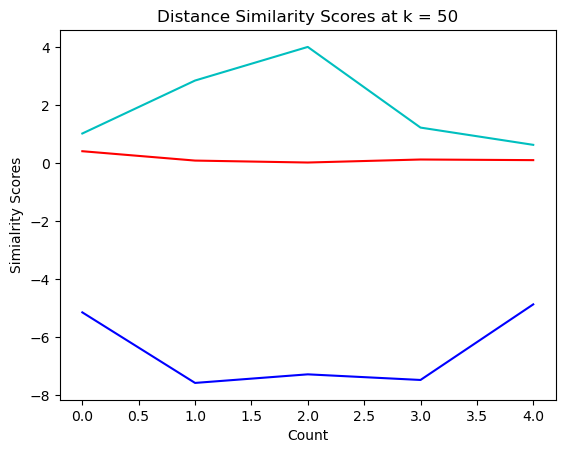

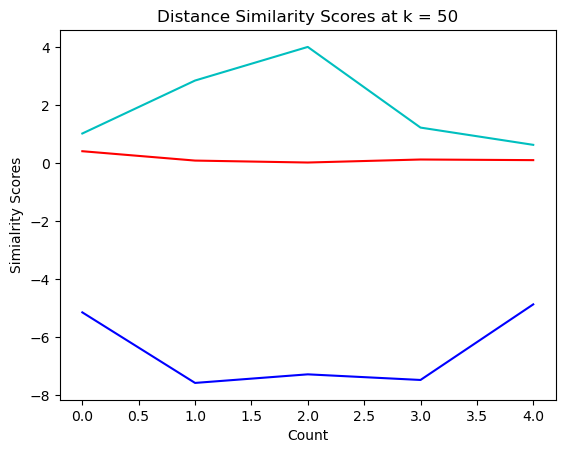

,Calculated,Similarity,Actual
0,[['night']],0.411769,duck
1,[['fell']],0.089228,squash
2,[['thunder']],0.022336,damage
3,[['ascent']],0.126226,ascent
4,[['foot']],0.104647,render


,Calculated,Similarity,Actual
0,[['night']],-5.139254,duck
1,[['fell']],-7.569297,squash
2,[['thunder']],-7.273635,damage
3,[['ascent']],-7.467527,ascent
4,[['days']],-4.863820,render


,Calculated,Similarity,Actual
0,[['storm']],1.021921,duck
1,[['curate']],2.846515,squash
2,[['outwit']],4.004144,damage
3,[['child']],1.225594,ascent
4,[['foot']],0.631164,render


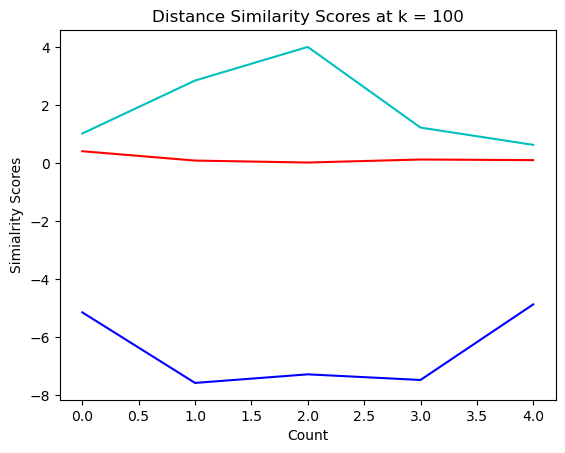

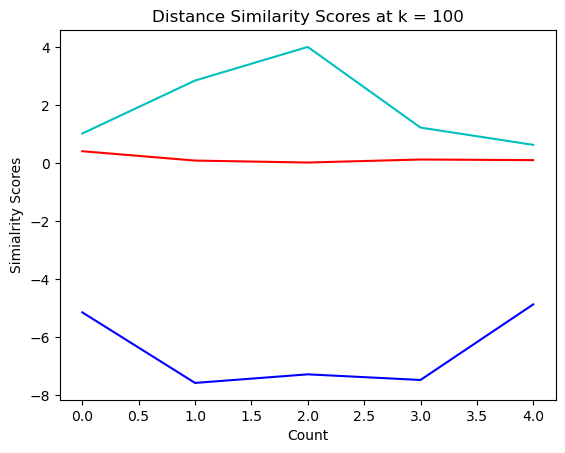

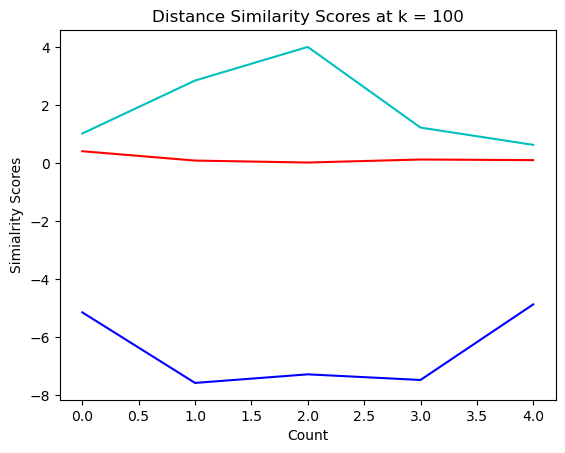

,Calculated,Similarity,Actual
0,[['night']],0.411769,duck
1,[['fell']],0.089228,squash
2,[['thunder']],0.022336,damage
3,[['ascent']],0.126226,ascent
4,[['foot']],0.104647,render


,Calculated,Similarity,Actual
0,[['night']],-5.139254,duck
1,[['fell']],-7.569297,squash
2,[['thunder']],-7.273635,damage
3,[['ascent']],-7.467527,ascent
4,[['days']],-4.863820,render


,Calculated,Similarity,Actual
0,[['storm']],1.021921,duck
1,[['curate']],2.846515,squash
2,[['outwit']],4.004144,damage
3,[['child']],1.225594,ascent
4,[['foot']],0.631164,render


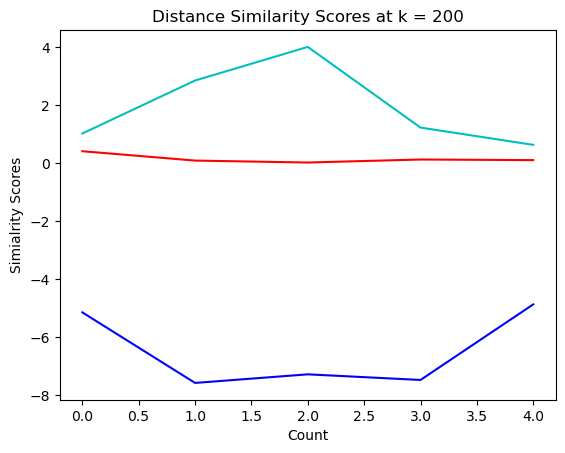

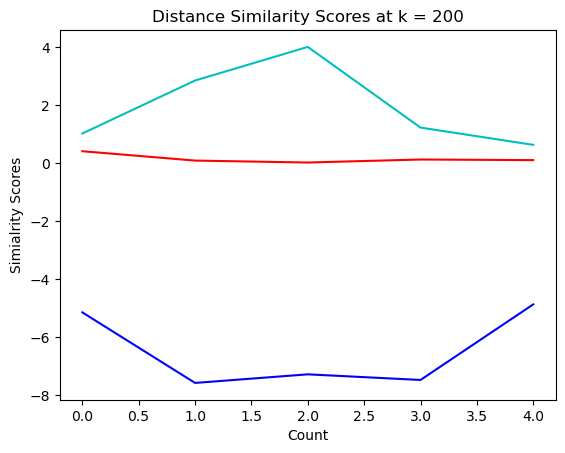

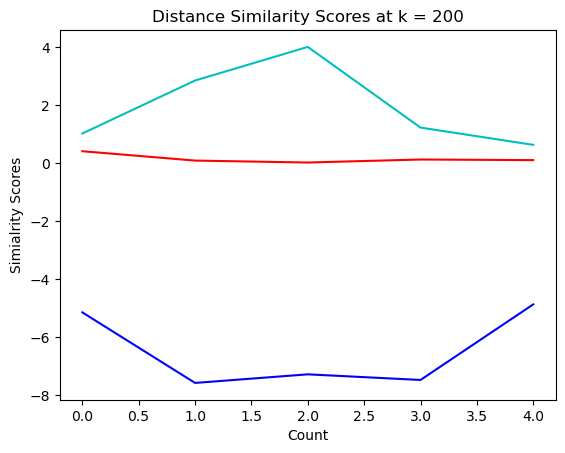

,Calculated,Similarity,Actual
0,[['night']],0.411769,duck
1,[['fell']],0.089228,squash
2,[['thunder']],0.022336,damage
3,[['ascent']],0.126226,ascent
4,[['foot']],0.104647,render


,Calculated,Similarity,Actual
0,[['night']],-5.139254,duck
1,[['fell']],-7.569297,squash
2,[['thunder']],-7.273635,damage
3,[['ascent']],-7.467527,ascent
4,[['days']],-4.863820,render


,Calculated,Similarity,Actual
0,[['storm']],1.021921,duck
1,[['curate']],2.846515,squash
2,[['outwit']],4.004144,damage
3,[['child']],1.225594,ascent
4,[['foot']],0.631164,render


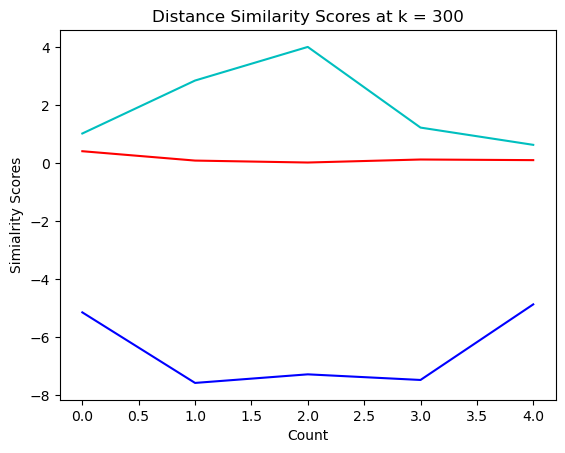

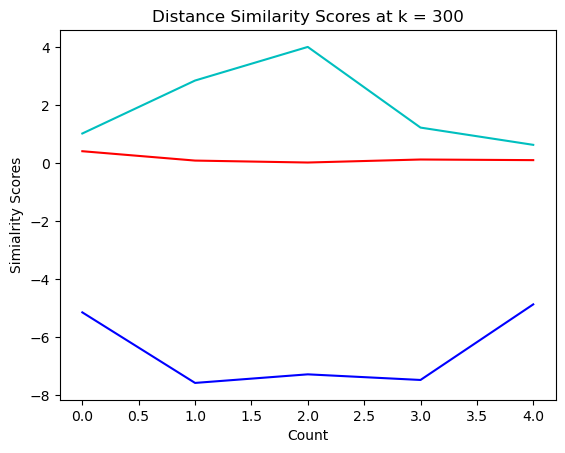

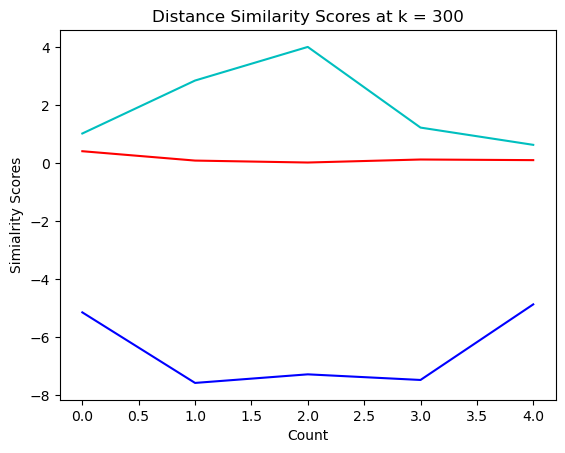

,Calculated,Similarity,Actual
0,[['night']],0.411769,duck
1,[['fell']],0.089228,squash
2,[['thunder']],0.022336,damage
3,[['ascent']],0.126226,ascent
4,[['foot']],0.104647,render


,Calculated,Similarity,Actual
0,[['night']],-5.139254,duck
1,[['fell']],-7.569297,squash
2,[['thunder']],-7.273635,damage
3,[['ascent']],-7.467527,ascent
4,[['days']],-4.863820,render


,Calculated,Similarity,Actual
0,[['storm']],1.021921,duck
1,[['curate']],2.846515,squash
2,[['outwit']],4.004144,damage
3,[['child']],1.225594,ascent
4,[['foot']],0.631164,render


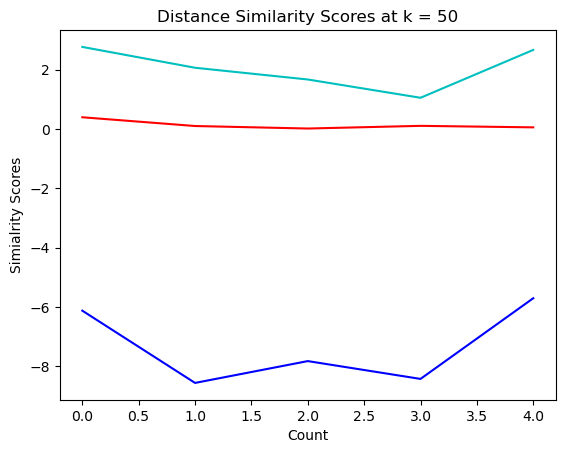

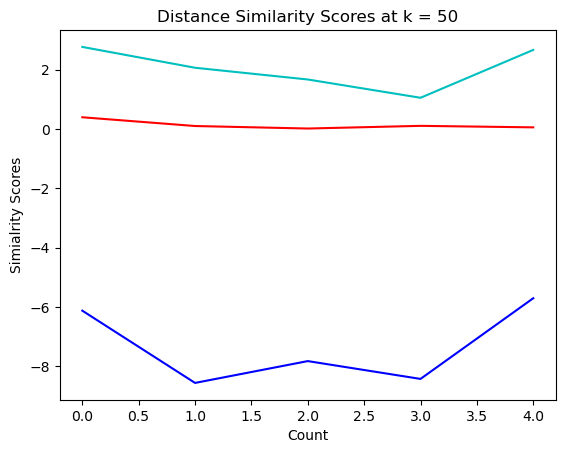

,Calculated,Similarity,Actual
0,[['night']],0.398689,duck
1,[['fell']],0.103716,squash
2,[['london']],0.019013,damage
3,[['ascent']],0.109384,ascent
4,[['days']],0.058772,render


,Calculated,Similarity,Actual
0,[['night']],-6.121518,duck
1,[['fell']],-8.556953,squash
2,[['thunder']],-7.821177,damage
3,[['absence']],-8.422021,ascent
4,[['days']],-5.702315,render


,Calculated,Similarity,Actual
0,[['thrills']],2.770148,duck
1,[['curate']],2.067630,squash
2,[['thunder']],1.672064,damage
3,[['child']],1.055760,ascent
4,[['death']],2.668830,render


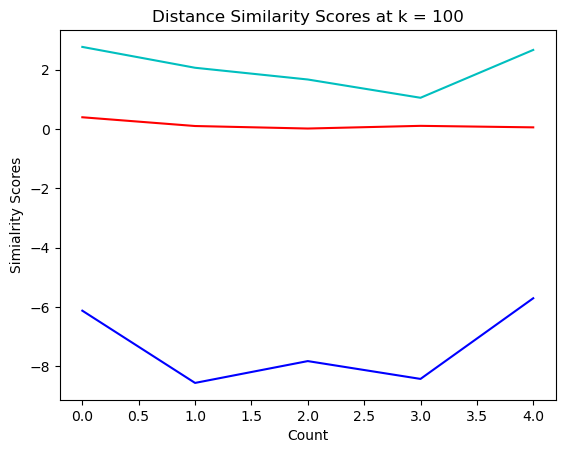

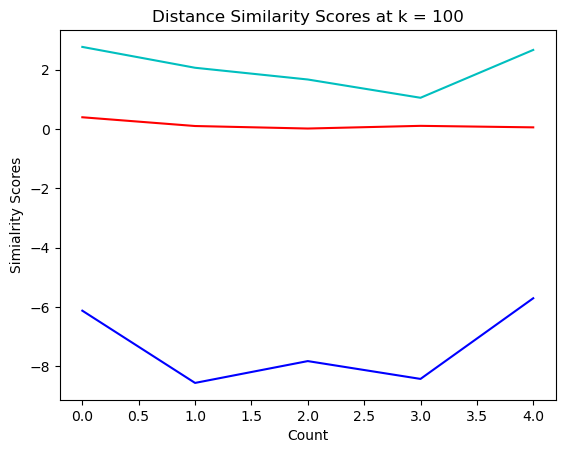

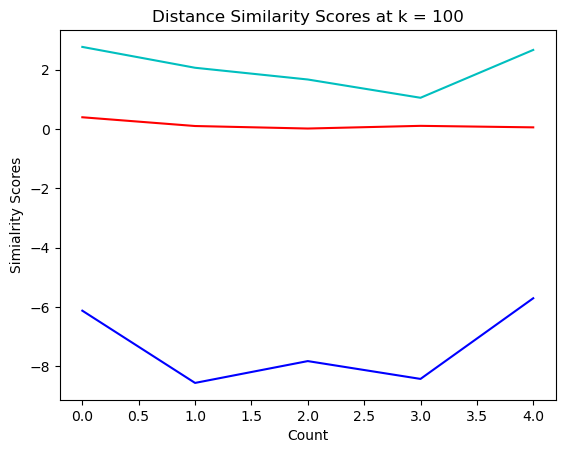

,Calculated,Similarity,Actual
0,[['night']],0.398689,duck
1,[['fell']],0.103716,squash
2,[['london']],0.019013,damage
3,[['ascent']],0.109384,ascent
4,[['days']],0.058772,render


,Calculated,Similarity,Actual
0,[['night']],-6.121518,duck
1,[['fell']],-8.556953,squash
2,[['thunder']],-7.821177,damage
3,[['absence']],-8.422021,ascent
4,[['days']],-5.702315,render


,Calculated,Similarity,Actual
0,[['thrills']],2.770148,duck
1,[['curate']],2.067630,squash
2,[['thunder']],1.672064,damage
3,[['child']],1.055760,ascent
4,[['death']],2.668830,render


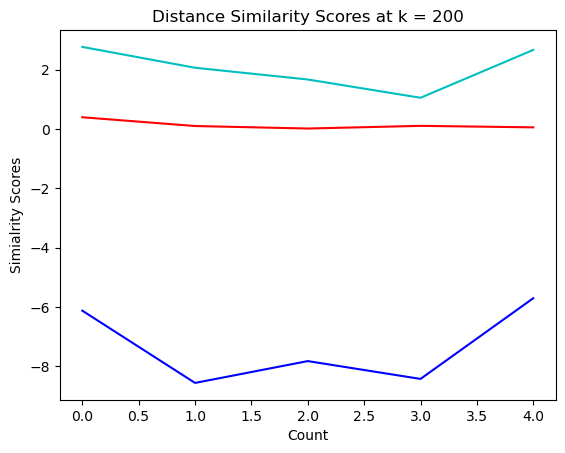

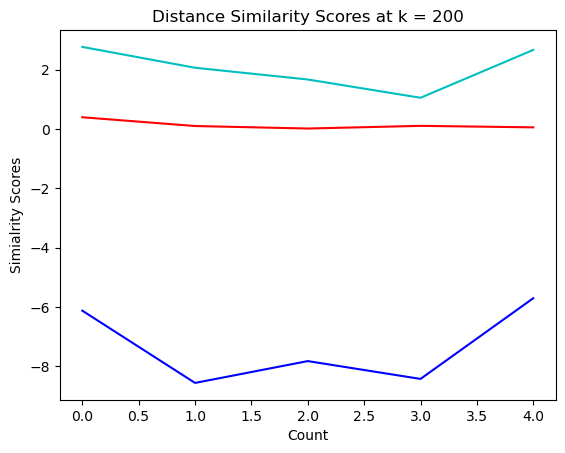

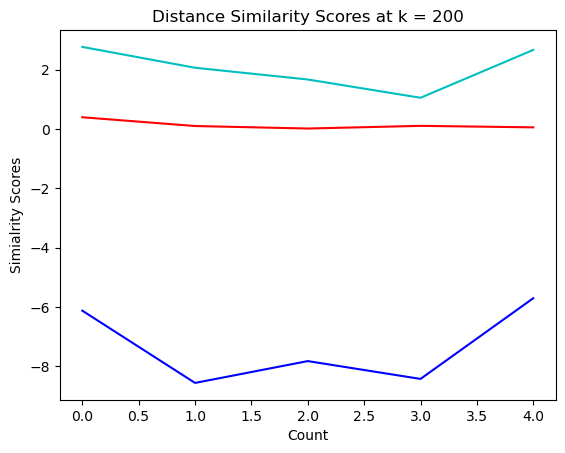

,Calculated,Similarity,Actual
0,[['night']],0.398689,duck
1,[['fell']],0.103716,squash
2,[['london']],0.019013,damage
3,[['ascent']],0.109384,ascent
4,[['days']],0.058772,render


,Calculated,Similarity,Actual
0,[['night']],-6.121518,duck
1,[['fell']],-8.556953,squash
2,[['thunder']],-7.821177,damage
3,[['absence']],-8.422021,ascent
4,[['days']],-5.702315,render


,Calculated,Similarity,Actual
0,[['thrills']],2.770148,duck
1,[['curate']],2.067630,squash
2,[['thunder']],1.672064,damage
3,[['child']],1.055760,ascent
4,[['death']],2.668830,render


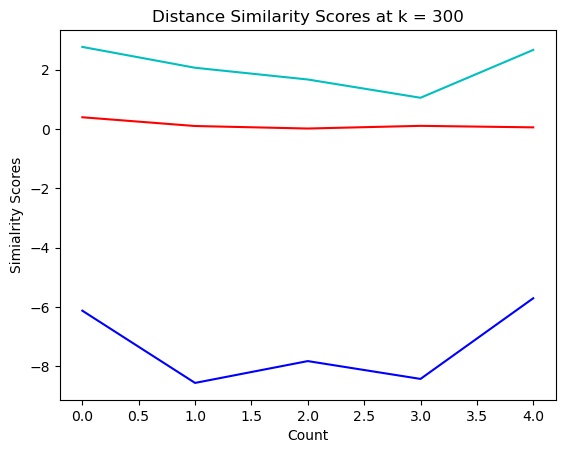

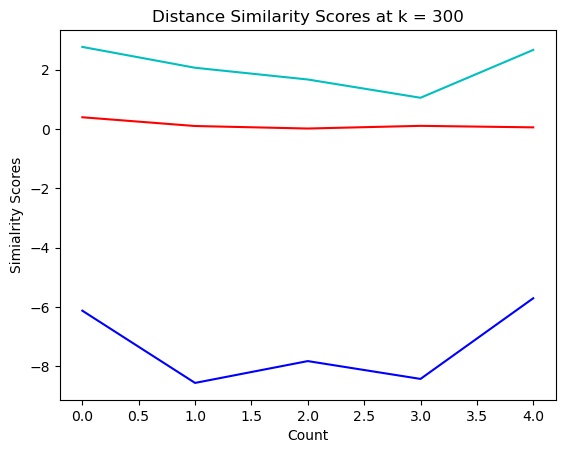

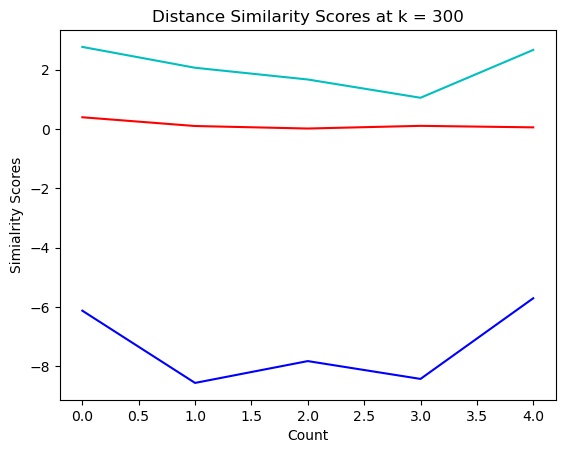

,Calculated,Similarity,Actual
0,[['night']],0.398689,duck
1,[['fell']],0.103716,squash
2,[['london']],0.019013,damage
3,[['ascent']],0.109384,ascent
4,[['days']],0.058772,render


,Calculated,Similarity,Actual
0,[['night']],-6.121518,duck
1,[['fell']],-8.556953,squash
2,[['thunder']],-7.821177,damage
3,[['absence']],-8.422021,ascent
4,[['days']],-5.702315,render


,Calculated,Similarity,Actual
0,[['thrills']],2.770148,duck
1,[['curate']],2.067630,squash
2,[['thunder']],1.672064,damage
3,[['child']],1.055760,ascent
4,[['death']],2.668830,render


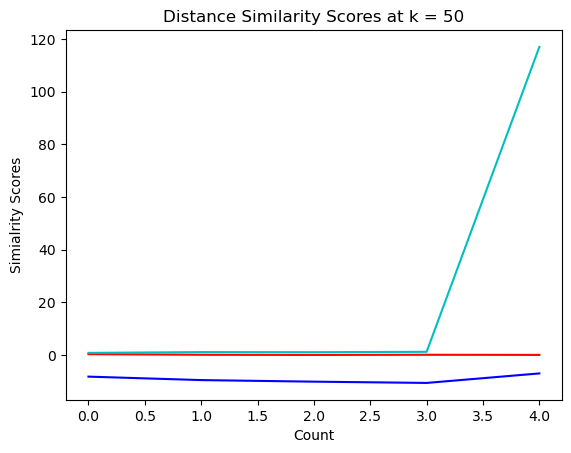

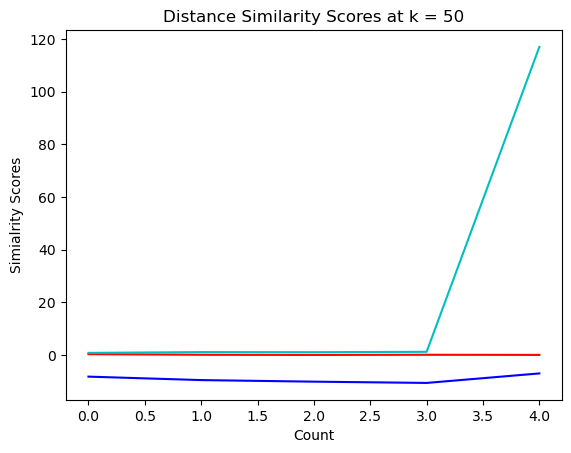

,Calculated,Similarity,Actual
0,[['night']],0.323546,duck
1,[['fell']],0.086107,squash
2,[['thunder']],0.024712,damage
3,[['ascent']],0.088820,ascent
4,[['days']],0.034136,render


,Calculated,Similarity,Actual
0,[['night']],-8.216085,duck
1,[['fell']],-9.532506,squash
2,[['thunder']],-10.130370,damage
3,[['absence']],-10.609083,ascent
4,[['days']],-7.003567,render


,Calculated,Similarity,Actual
0,[['thrills']],0.799622,duck
1,[['curate']],1.104296,squash
2,[['outwit']],1.064845,damage
3,[['child']],1.209616,ascent
4,[['imprisonment']],117.038647,render


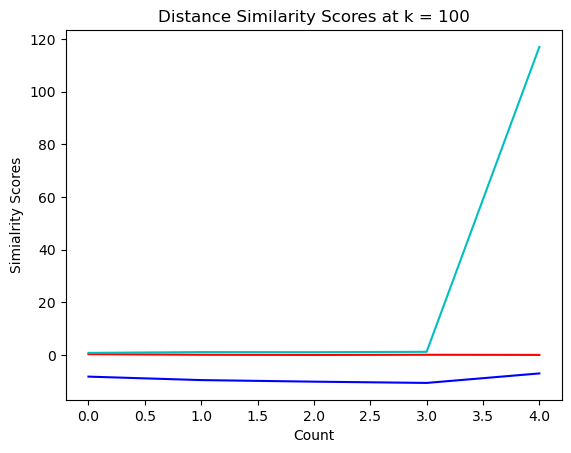

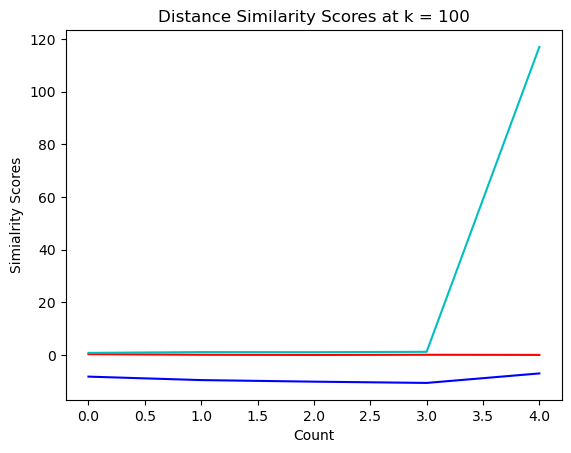

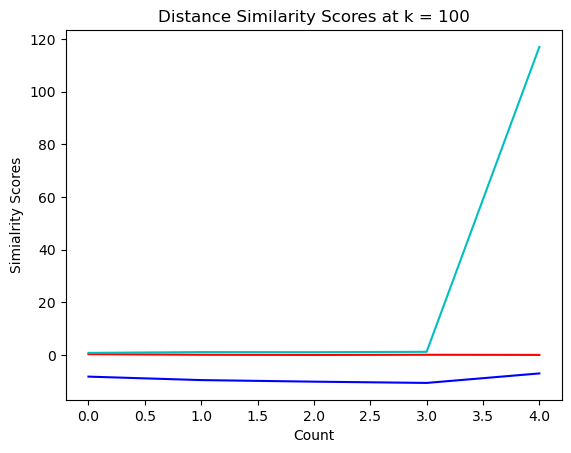

,Calculated,Similarity,Actual
0,[['night']],0.323546,duck
1,[['fell']],0.086107,squash
2,[['thunder']],0.024712,damage
3,[['ascent']],0.088820,ascent
4,[['days']],0.034136,render


,Calculated,Similarity,Actual
0,[['night']],-8.216085,duck
1,[['fell']],-9.532506,squash
2,[['thunder']],-10.130370,damage
3,[['absence']],-10.609083,ascent
4,[['days']],-7.003567,render


,Calculated,Similarity,Actual
0,[['thrills']],0.799622,duck
1,[['curate']],1.104296,squash
2,[['outwit']],1.064845,damage
3,[['child']],1.209616,ascent
4,[['imprisonment']],117.038647,render


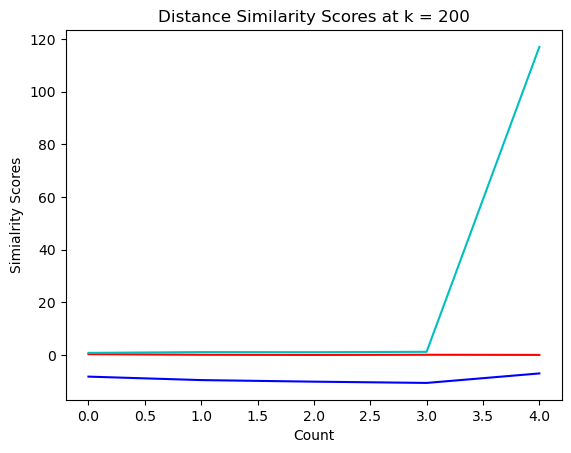

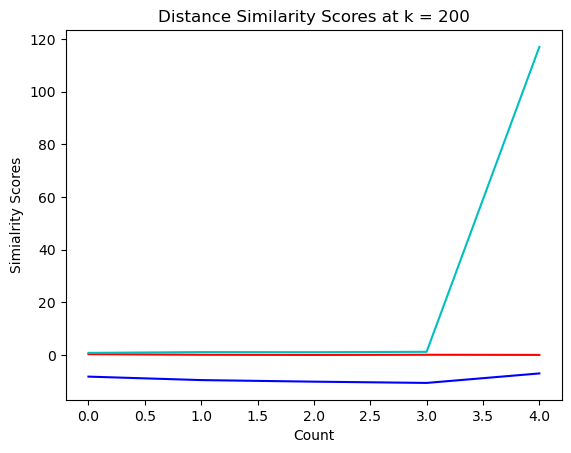

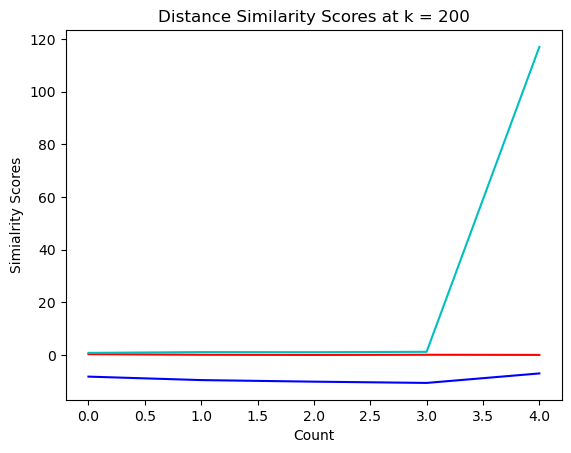

,Calculated,Similarity,Actual
0,[['night']],0.323546,duck
1,[['fell']],0.086107,squash
2,[['thunder']],0.024712,damage
3,[['ascent']],0.088820,ascent
4,[['days']],0.034136,render


,Calculated,Similarity,Actual
0,[['night']],-8.216085,duck
1,[['fell']],-9.532506,squash
2,[['thunder']],-10.130370,damage
3,[['absence']],-10.609083,ascent
4,[['days']],-7.003567,render


,Calculated,Similarity,Actual
0,[['thrills']],0.799622,duck
1,[['curate']],1.104296,squash
2,[['outwit']],1.064845,damage
3,[['child']],1.209616,ascent
4,[['imprisonment']],117.038647,render


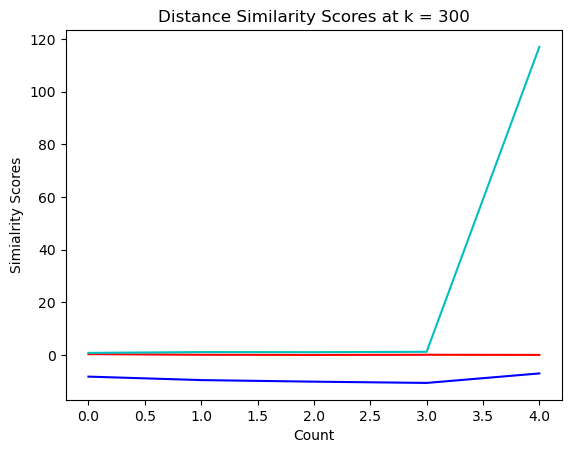

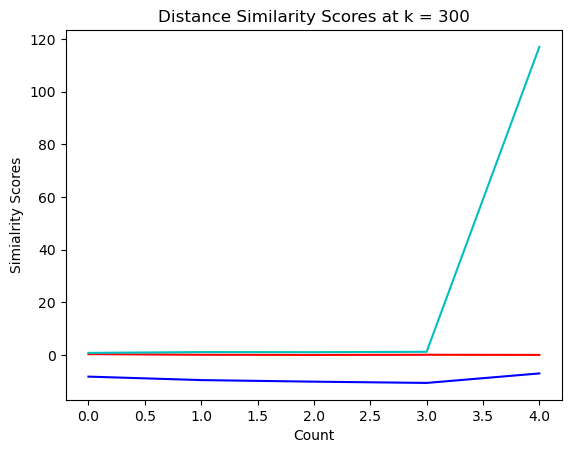

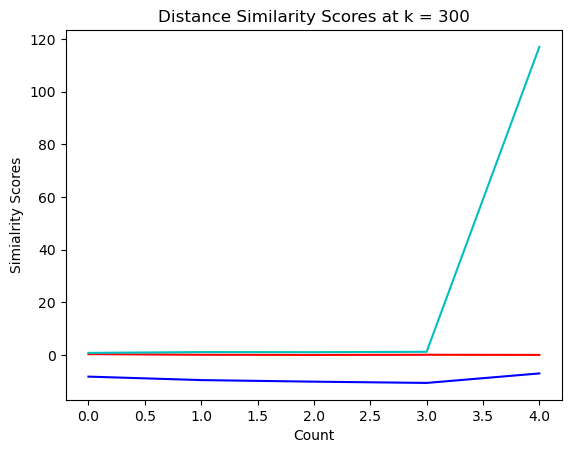

,Calculated,Similarity,Actual
0,[['night']],0.323546,duck
1,[['fell']],0.086107,squash
2,[['thunder']],0.024712,damage
3,[['ascent']],0.088820,ascent
4,[['days']],0.034136,render


,Calculated,Similarity,Actual
0,[['night']],-8.216085,duck
1,[['fell']],-9.532506,squash
2,[['thunder']],-10.130370,damage
3,[['absence']],-10.609083,ascent
4,[['days']],-7.003567,render


,Calculated,Similarity,Actual
0,[['thrills']],0.799622,duck
1,[['curate']],1.104296,squash
2,[['outwit']],1.064845,damage
3,[['child']],1.209616,ascent
4,[['imprisonment']],117.038647,render


In [124]:
glove_arr = ["50", "100", "200", "300"]

## Calling Glove Model

for i in range(len(genre_arr)):
    for j in range(len(glove_arr)):
        
        path = "glove.6B/glove.6B." + glove_arr[i] + "d.txt"
        glove_word_vector = parse_file(path)
        
        cosi_similarity_glove, eucd_similarity_glove, yule_similarity_glove = cal_distances(que_list, opt_list, k = glove_arr[j], model="GloVe")

        # Displaying Similarity Scores

        display(cosi_similarity_glove.style.set_caption("Glove Cosine Similarity Scores for " + genre_arr[i] + " using Glove at " + glove_arr[j]))
        display(eucd_similarity_glove.style.set_caption("Glove Euclidean Similarity Scores for " + genre_arr[i] + " using Glove at " + glove_arr[j]))
        display(yule_similarity_glove.style.set_caption("Glove Yule Similarity Scores for " + genre_arr[i] + " using Glove at " + glove_arr[j]))



#### MDS